## GITHUB LINK: https://github.com/CharSiu8/insurance-claims-prediction-logistic-regression.git

## THE DATA you can download here: https://drive.google.com/file/d/1SiDNh9YFIiC4NjekT9R1vVfOyAdIHiFX/view?usp=sharing

## Check out also the AI Data Auditor Model I built which runs this same data as test_data! : https://github.com/CharSiu8/data_auditor.git

## PROJECT OVERVIEW:
Logistic regression project comparing manual implementation with sklearn industry-standard workflow

I completed this project to show my ability to use logistic regression for modeling through a simple(logit) solution where I blindly looped to find accuracy then used a confusion matrix to manually calculate the ratio of correct guesses to total rows.

I also provided a more analytical solution with the industry standards where I focused on pre-processing and visualization before running the math, then I used heatmapping to establish sanity/pre-screen features for quality, then validated with sklearn.

## PROJECT ASSIGNMENT:
Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

(`Source: https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf`)

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.





## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code |
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client |
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [ ]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

# Loading Data
car_insurance = pd.read_csv('/content/drive/MyDrive/Polino Technical Portfolio/Data Science/DATASETS FOR VIEWERS/Modeling Insurance Claims Data.csv')

SIMPLE SOLUTION
looping blindly to find accuracy then using confusion matrix to manually calculate the ratio of correct guesses to total rows.


In [ ]:

# Read in dataset
cars = car_insurance.copy()

# Check for missing values
cars.info()

# Fill missing values with the mean
cars["credit_score"].fillna(cars["credit_score"].mean(), inplace=True)
cars["annual_mileage"].fillna(cars["annual_mileage"].mean(), inplace=True)

# Empty list to store model results
models = []

# Feature columns
features = cars.drop(columns=["id", "outcome"]).columns

# Loop through features
for col in features:
    # Create a model
    model = logit(f"outcome ~ {col}", data=cars).fit()
    # Add each model to the models list
    models.append(model)

# Empty list to store accuracies
accuracies = []

# Loop through models
for feature in range(0, len(models)):
    # Compute the confusion matrix
    conf_matrix = models[feature].pred_table()
    # True negatives
    tn = conf_matrix[0,0]
    # True positives
    tp = conf_matrix[1,1]
    # False negatives
    fn = conf_matrix[1,0]
    # False positives
    fp = conf_matrix[0,1]
    # Compute accuracy
    acc = (tn + tp) / (tn + fn + fp + tp)
    accuracies.append(acc)

# Find the feature with the largest accuracy
best_feature = features[accuracies.index(max(accuracies))]

# Create best_feature_df
best_feature_df = pd.DataFrame({"best_feature": best_feature,
                                "best_accuracy": max(accuracies)},
                                index=[0])
best_feature_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

/tmp/ipython-input-2470260644.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars["credit_score"].fillna(cars["credit_score"].mean(), inplace=True)
/tmp/ipython-input-2470260644.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.617345
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605716
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.621700
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.558922
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.598699
  

,best_feature,best_accuracy
0,driving_experience,0.7771


ANALYTICAL WORKFLOW SOLUTION
including skicit and ML Prep
focused on pre-processing and visualization before running the math
heatmapping to screen features for quality, then validating.

In [ ]:
df = car_insurance.copy()
df.head(1)

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0


In [ ]:
#Observing and comparing data to find 'the single feature that is best predictor of whether a customer will put a claim in the outcome column, excluding id column'
df = df.drop(columns=["id"]
            )

In [ ]:
df.head(1)

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0


In [ ]:
# Checking data types to see what needs to be cleaned and if types are reliable to compare
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  int64  
 1   gender               10000 non-null  int64  
 2   driving_experience   10000 non-null  object 
 3   education            10000 non-null  object 
 4   income               10000 non-null  object 
 5   credit_score         9018 non-null   float64
 6   vehicle_ownership    10000 non-null  float64
 7   vehicle_year         10000 non-null  object 
 8   married              10000 non-null  float64
 9   children             10000 non-null  float64
 10  postal_code          10000 non-null  int64  
 11  annual_mileage       9043 non-null   float64
 12  vehicle_type         10000 non-null  object 
 13  speeding_violations  10000 non-null  int64  
 14  duis                 10000 non-null  int64  
 15  past_accidents       10000 non-null  

In [ ]:
# Found some missing values
df["credit_score"].fillna(df["credit_score"].mean(), inplace=True)
df["annual_mileage"].fillna(df["annual_mileage"].mean(), inplace=True)


/tmp/ipython-input-2974779698.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["credit_score"].fillna(df["credit_score"].mean(), inplace=True)
/tmp/ipython-input-2974779698.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

# All applicable object type columns need to be converted so the machine can understand them;
driving experience,
education,
income,
vehicle year,
vehicle type

In [ ]:
df['driving_experience'].value_counts()

,count
driving_experience,
0-9y,3530
10-19y,3299
20-29y,2119
30y+,1052


In [ ]:
# Driving experience is 4 categories: 0-9y, 19-19y, 20-29y, 30y+
# Checked for null values and extra spaces in valuecounts, none found. data is clean and ready to be mapped
# Solution for driving_experience is ordinal mapping manually
driving_exp_mapping = {
    '0-9y': 0,
    '10-19y': 1,
    '20-29y': 2,
    '30y+': 3
}

df['driving_experience'] = df['driving_experience'].map(driving_exp_mapping)
df['driving_experience'].value_counts()

,count
driving_experience,
0,3530
1,3299
2,2119
3,1052


In [ ]:
# education
df['education'].value_counts()

,count
education,
high school,4157
university,3928
none,1915


In [ ]:
# Converting Education from object
# Found as high school, university, none
# Mapping
education_mapping = {
    'high school': 0,
    'university': 1,
    'none': 3
}
df['education'] = df['education'].map(education_mapping)
df['education'].value_counts()

,count
education,
0,4157
1,3928
3,1915


In [ ]:
# Income
df['income'].value_counts()

,count
income,
upper class,4336
middle class,2138
poverty,1814
working class,1712


In [ ]:
# Converting income
# mapping and cleaning order to make higher classes represented > poverty
income_mapping = {
    'poverty': 0,
    'working class': 1,
    'middle class': 2,
    'upper class': 3
    }
df['income'] = df['income'].map(income_mapping)
df['income'].value_counts()

,count
income,
3,4336
2,2138
0,1814
1,1712


In [ ]:
# Vehicle year
df['vehicle_year'].value_counts()

,count
vehicle_year,
before 2015,6967
after 2015,3033


In [ ]:
# Mapping vehicle year
vehicle_year_mapped = {
    'before 2015': 0,
    'after 2015': 1
}

df['vehicle_year'] = df['vehicle_year'].map(vehicle_year_mapped)
df['vehicle_year'].value_counts()

,count
vehicle_year,
0,6967
1,3033


In [ ]:
# Vehicle Type
df['vehicle_type'].value_counts()

,count
vehicle_type,
sedan,9523
sports car,477


In [ ]:
# Vehicle type conversion
vehicle_type_mapping = {
    'sedan': 0,
    'sports car':1
}
df['vehicle_type'] = df['vehicle_type'].map(vehicle_type_mapping)
df['vehicle_type'].value_counts()

,count
vehicle_type,
0,9523
1,477


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  int64  
 1   gender               10000 non-null  int64  
 2   driving_experience   10000 non-null  int64  
 3   education            10000 non-null  int64  
 4   income               10000 non-null  int64  
 5   credit_score         10000 non-null  float64
 6   vehicle_ownership    10000 non-null  float64
 7   vehicle_year         10000 non-null  int64  
 8   married              10000 non-null  float64
 9   children             10000 non-null  float64
 10  postal_code          10000 non-null  int64  
 11  annual_mileage       10000 non-null  float64
 12  vehicle_type         10000 non-null  int64  
 13  speeding_violations  10000 non-null  int64  
 14  duis                 10000 non-null  int64  
 15  past_accidents       10000 non-null  

All data has been converted for ML


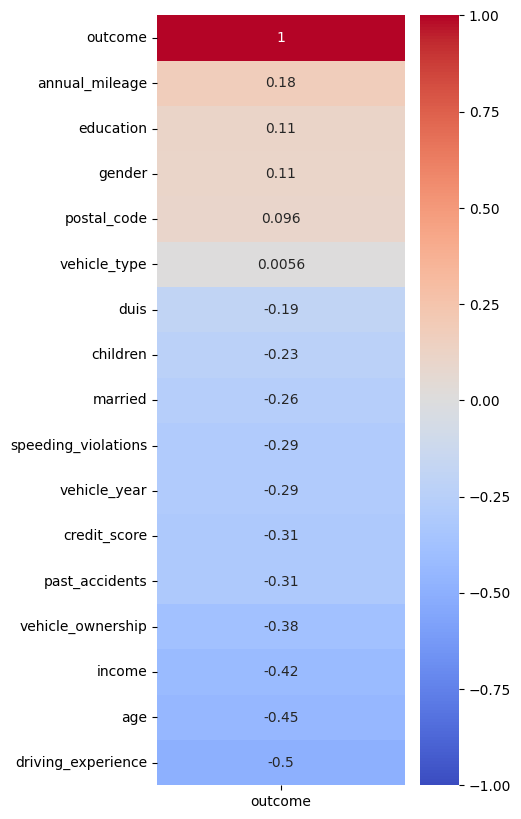

In [ ]:
# Need to make one really big heatmap for a pre-logit sanity check and to get general idea
# importing
import seaborn as sns
import matplotlib.pyplot as plt
# Start with corr Matrix
plt.figure(figsize=(4, 10))
# one lining corr matrix and heatmap
sns.heatmap(df.corr()[['outcome']].sort_values(by='outcome', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Store as a DataFrame called best_feature_df, containing columns named "best_feature" and "best_accuracy" with the name of the feature with the highest accuracy, and the respective accuracy score.
all_results



In [ ]:
# Beginning logit looping with skicit to compare
# Importing skicit
from sklearn.metrics import accuracy_score
results = []

for col in df.drop(columns=['outcome']).columns:
    # Training model
    model = logit(f"outcome ~ {col}", data=df).fit(disp=0)

    # Predicting and calculatinmg accuracy
    pred = (model.predict(df[col]) > 0.5).astype(int)
    acc = accuracy_score(df['outcome'], pred)

    results.append({'best_feature': col, 'best_accuracy': acc})

# Convert to DataFrame and find the top one
sk_all_results_df = pd.DataFrame(results)
sk_best_feature_df = sk_all_results_df.sort_values(by='best_accuracy', ascending=False).head(1)

sk_best_feature_df

,best_feature,best_accuracy
2,driving_experience,0.7771
